_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
6812,14,14222.0,5,42,1.6,0,1,2015,0
4644,56,9299.0,1,140,1.8,1,1,2007,0
481,5,11400.0,3,206,3.0,3,1,2003,2
4669,43,14000.0,3,191,3.0,2,1,2006,2
8208,77,4100.0,1,160,1.8,3,1,2006,0
172,50,9200.0,2,280,2.4,3,1,2003,2
608,74,33715.5,0,1,2.7,3,1,2015,1
6814,34,27900.0,3,49,2.5,3,1,2013,2
7348,14,4600.0,5,299,2.0,0,1,2005,0
8298,74,13300.0,3,104,2.4,3,1,2007,0


In [14]:
df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000


In [3]:
cars = df.copy()

# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [4]:
X = cars.drop(columns='price', axis=1)
y = cars['price']
X.shape, y.shape

((8495, 8), (8495,))

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6796, 8), (1699, 8), (6796,), (1699,))

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [22]:
features = ['year', 'mileage']

model = LinearRegression()
model.fit(X_train[features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [23]:
print('Intercept:', model.intercept_)
print('Coefficients:\n', pd.Series(model.coef_, features))

Intercept: -2080152.8168321557
Coefficients:
 year       1047.962892
mileage     -45.955709
dtype: float64


## 1.5 Use the test data to make predictions.

In [25]:
y_pred = model.predict(X_test[features])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [27]:
rmse = np.sqrt( mean_squared_error(y_true=y_test, y_pred=y_pred) )
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('RMSE:', rmse)
print('r2:', r2)

RMSE: 23023.641383164486
r2: 0.1802189032887347


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?

For every increase in year (meaning the car is newer) the value of the car is expected to increase by ~$1,048 dollars. 

## 1.8 How should we interpret the Root Mean Square Error?

On average the model's estimate for the price of a car is off by approximately $23,023.

## 1.9 How should we interpret the $R^2$?

The model explains 18% of the price of the cars. R squared assesses how closely the actual data is fitted to the regression line. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [38]:
y_train = np.log(y_train)
y_test = np.log(y_test)

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

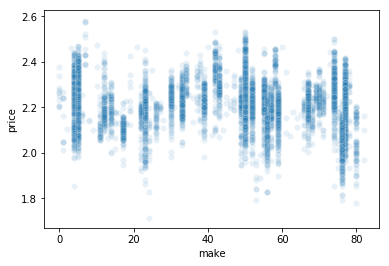

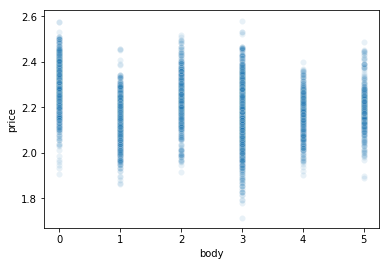

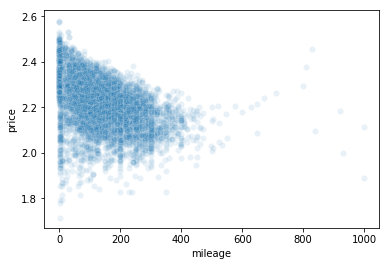

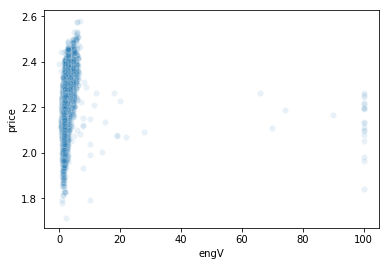

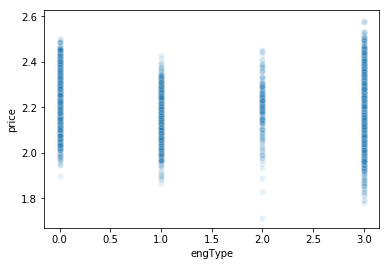

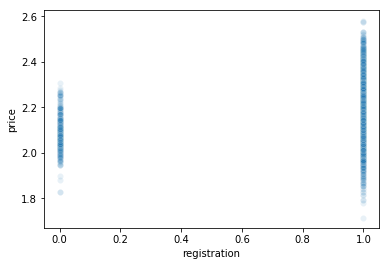

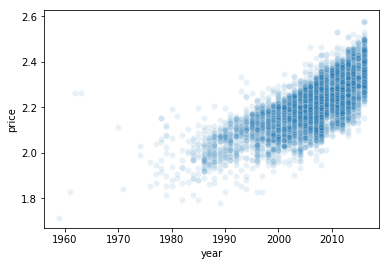

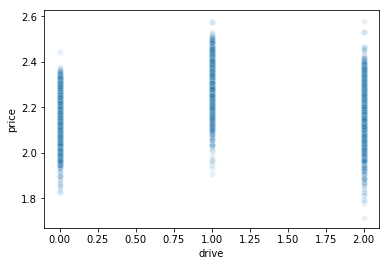

In [39]:
target = y_train
features = ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']
for feature in X_train[features]:
    sns.scatterplot(x=feature, y=target, data=cars, alpha=0.1)
    plt.show()

Notes on scatterplots:
- I think 'make' should be encdoded with dummy variables as the increased values don't actually mean anything.
- Body should also be encoded with dummy variables
- There appear to be a number of outliers in the dataset which don't corrspond to the overall trend (possibly collectibles/antiques?)
- engV appears to be a  split between normal cars and some outliers (possibly trucks/sports cars)
- engType should be a dummy variable as well
- Registration appears to be related to price
- Year again appears to have a slightly exponential relationship to price (again some outliers from likely antique cars)
- Drive seems like it should also be a dummy variable

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [40]:
X_train['year**3'] = X_train['year'] ** 3
X_train['engine_sum'] = X_train['engType'] + X_train['drive'] + X_train['engV']  

X_test['year**3'] = X_test['year'] ** 3
X_test['engine_sum'] = X_test['engType'] + X_test['drive'] + X_test['engV']  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [42]:
X_train.shape, X_test.shape

((6796, 10), (1699, 10))

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_pred = model.predict(X_test)

rmse = np.sqrt( mean_squared_error(y_true=y_test, y_pred=y_pred) )
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('RMSE:', rmse)
print('r2:', r2)
print('Intercept:', model.intercept_)
print('Coefficients:\n', pd.Series(model.coef_, X_train.columns))

RMSE: 7.044683019621523
r2: -50.78361634635628
Intercept: 329.25053012644776
Coefficients:
 make           -1.914515e-04
body           -9.864900e-03
mileage         9.334009e-05
engV           -7.899895e-03
engType        -1.392208e-02
registration    8.027234e-02
year           -2.508842e-01
drive           3.056485e-02
year**3         2.182160e-08
engine_sum      8.742873e-03
dtype: float64


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?

Coefficients in log-linear regression are interpreted in percentage terms rather than absoluate value. For example, the predicted price of car increases by X% (the coefficient) based on one unit increase in the feature.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [51]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [53]:
print('R^2', tree.score(X_test, y_test))

R^2 -50.78587702027835


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [62]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     521.5
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:01:32   Log-Likelihood:                 9568.3
No. Observations:                6796   AIC:                        -1.912e+04
Df Residuals:                    6786   BIC:                        -1.905e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          329.2505     65.420      5.033   

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 8
  'rank is %d' % (J, J_), ValueWarning)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
Yes, the polynomial features created introduced substantial multicollinearity into the model. Although some may have existed regardless between the features that describe the engine. 

In [63]:
X = sm.add_constant(X_train)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vif, index=X.columns)

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const           0.000000e+00
make            1.059416e+00
body            1.163765e+00
mileage         1.989797e+00
engV                     inf
engType                  inf
registration    1.107152e+00
year            3.733473e+04
drive                    inf
year**3         3.746341e+04
engine_sum               inf
dtype: float64